## Exploratory data anylsis NCS dataset

Start by importing the dataset and doing some basic data exploration

In [1]:
import impyute
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from impyute.imputation.cs import mice
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

Join the child table, to add importand variables on the birth to the mother ID number (MOM_PIDX)

In [2]:
# Variables to join are: CHILD_SEX, CHILD_RACE, GESTATIONAL_AGE, MULTIPLE, SIBLINGS, 
# MOM_RACE, MOM_AGE, MOM_INSURANCE, MOM_MARISTAT, MOM_EDUCATION.

In [3]:
data= pd.read_csv('ncs_mom.csv')
#data

In [4]:
data_c= pd.read_csv('ncs_child.csv')
data_c1 = data_c.filter(['MOM_PIDX', 'GESTATIONAL_AGE', 'MOM_AGE', 'MOM_INSURANCE'])
#data_c1

In [5]:
#df_1 = pd.merge(data, data_c1, join='inner')
#df_1 = pd.merge([data.set_index('MOM_PIDX'), data_c1.set_index('MOM_PIDX'),how ='right']).dropna()
df_1 = data.merge(data_c1, how='right', on='MOM_PIDX').dropna()

#result = pd.concat([df1, df4], axis=1, join='inner')
df_1

,MOM_PIDX,HEALTH,BMI,BMI_CAT,THYROID,HIGHBP_NOTPREG,ASTHMA,DIABETES,HIGHBP_PREG,PREECLAMPSIA,...,KIDNEY,NAUSEA,RH_DISEASE,URINE,VAGINOSIS,GROUP_B,CIG_NOW,GESTATIONAL_AGE,MOM_AGE,MOM_INSURANCE
0,b00014490,1,22,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,34,2
1,b00028364,1,22.9,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,32,2
2,b00048093,2,24.8,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,21,3
3,b00060642,2,37.8,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,21,3
4,b00096696,1,28,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,b99969191,1,26.5,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,42,2
4478,b99977751,1,23.4,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,20,3
4479,b99989539,1,19.8,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4,21,3
4480,b99996827,1,28.3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,23,3


In [6]:
#remove M and switch to NAN
#df_2=[df_1!='M']
df_2= df_1.replace(to_replace=['M'], value=np.NaN)
df_2.isnull().sum()
#df_2

MOM_PIDX             0
HEALTH             149
BMI                862
BMI_CAT            862
THYROID              0
HIGHBP_NOTPREG       0
ASTHMA               0
DIABETES             0
HIGHBP_PREG          0
PREECLAMPSIA         0
EARLY_LABOR          0
ANEMIA               0
KIDNEY               0
NAUSEA               0
RH_DISEASE           0
URINE                0
VAGINOSIS            0
GROUP_B              0
CIG_NOW              0
GESTATIONAL_AGE     70
MOM_AGE             45
MOM_INSURANCE       82
dtype: int64

In [7]:
#for the time being, drop columns with high number of NaN
df_2 = df_2.drop(['BMI','BMI_CAT','HEALTH','GESTATIONAL_AGE', 'MOM_AGE', 'MOM_INSURANCE', 'MOM_PIDX'], axis=1)

In [8]:
#now drop all Nan across remaining rows
df_2 = df_2.dropna()
df_2.isnull().sum()

THYROID           0
HIGHBP_NOTPREG    0
ASTHMA            0
DIABETES          0
HIGHBP_PREG       0
PREECLAMPSIA      0
EARLY_LABOR       0
ANEMIA            0
KIDNEY            0
NAUSEA            0
RH_DISEASE        0
URINE             0
VAGINOSIS         0
GROUP_B           0
CIG_NOW           0
dtype: int64

In [10]:
print(df_1['BMI'].describe())

count     4482
unique     313
top          M
freq       862
Name: BMI, dtype: object


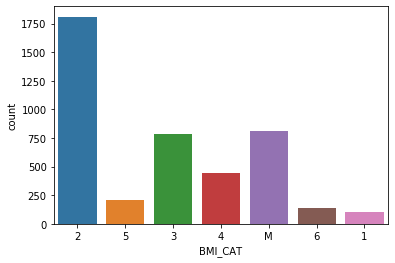

In [14]:
#look at the distribution of the BMI_CAT variable
sns.countplot(data = data, x = 'BMI_CAT')

In [15]:
print(len(data[data['EARLY_LABOR']==0]))
print(len(data[data['EARLY_LABOR']==1]))

4155
159


In [16]:
count_no_con = len(data[data['EARLY_LABOR']==0])
count_yes = len(data[data['EARLY_LABOR']==1])
pct_of_no_con = count_no_con/(count_no_con+count_yes)
print("percentage of term labor", pct_of_no_con*100)
pct_of_yes = count_yes/(count_no_con+count_yes)
print("percentage of preterm labor", pct_of_yes*100)

percentage of term labor 96.31432545201669
percentage of preterm labor 3.68567454798331


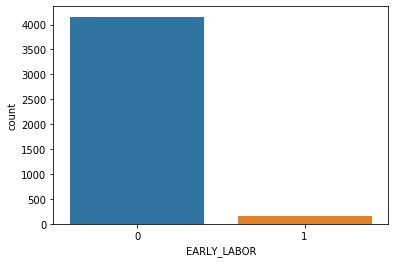

In [17]:
unbalanced = sns.countplot(x='EARLY_LABOR',data=data)
#unbalanced.savefig("unbalanced.png")
(unbalanced).get_figure().savefig('unbalanced.png')

In [19]:
data.groupby('EARLY_LABOR').mean()

,THYROID,HIGHBP_NOTPREG,ASTHMA,DIABETES,HIGHBP_PREG,PREECLAMPSIA,ANEMIA,KIDNEY,NAUSEA,RH_DISEASE,URINE,VAGINOSIS,GROUP_B,CIG_NOW
EARLY_LABOR,,,,,,,,,,,,,,
0,0.051023,0.034898,0.150181,0.055355,0.040915,0.005535,0.150421,0.081107,0.133574,0.029844,0.045487,0.049819,0.038026,0.084717
1,0.062893,0.081761,0.194969,0.138365,0.150943,0.031447,0.276730,0.245283,0.377358,0.025157,0.132075,0.094340,0.069182,0.163522


In [20]:
data.groupby('BMI_CAT').mean()

,THYROID,HIGHBP_NOTPREG,ASTHMA,DIABETES,HIGHBP_PREG,PREECLAMPSIA,EARLY_LABOR,ANEMIA,KIDNEY,NAUSEA,RH_DISEASE,URINE,VAGINOSIS,GROUP_B,CIG_NOW
BMI_CAT,,,,,,,,,,,,,,,
1,0.028302,0.009434,0.094340,0.028302,0.000000,0.000000,0.018868,0.207547,0.103774,0.094340,0.009434,0.018868,0.028302,0.028302,0.103774
2,0.056354,0.017127,0.144199,0.031492,0.016022,0.003315,0.032597,0.136464,0.079006,0.128177,0.024309,0.032044,0.045856,0.038122,0.070718
3,0.062025,0.034177,0.165823,0.053165,0.059494,0.006329,0.035443,0.149367,0.078481,0.145570,0.027848,0.058228,0.053165,0.046835,0.089873
4,0.051802,0.063063,0.191441,0.090090,0.076577,0.009009,0.033784,0.157658,0.092342,0.137387,0.051802,0.056306,0.049550,0.038288,0.114865
5,0.061611,0.109005,0.189573,0.151659,0.113744,0.018957,0.018957,0.189573,0.109005,0.146919,0.033175,0.075829,0.033175,0.033175,0.090047
6,0.126761,0.140845,0.281690,0.140845,0.161972,0.014085,0.049296,0.232394,0.140845,0.225352,0.049296,0.126761,0.105634,0.091549,0.112676
M,0.017263,0.034525,0.108508,0.071517,0.045623,0.008631,0.054254,0.171393,0.093711,0.165228,0.029593,0.055487,0.061652,0.028360,0.101110


In [21]:
data.groupby('NAUSEA').mean()

,THYROID,HIGHBP_NOTPREG,ASTHMA,DIABETES,HIGHBP_PREG,PREECLAMPSIA,EARLY_LABOR,ANEMIA,KIDNEY,RH_DISEASE,URINE,VAGINOSIS,GROUP_B,CIG_NOW
NAUSEA,,,,,,,,,,,,,,
0,0.050825,0.032171,0.140038,0.057313,0.039740,0.004325,0.026764,0.144634,0.071641,0.027845,0.042985,0.048391,0.037037,0.081103
1,0.055285,0.063415,0.222764,0.065041,0.076423,0.019512,0.097561,0.217886,0.180488,0.040650,0.082927,0.069919,0.052033,0.126829


Text(0, 0.5, 'EARLY_LABOR')

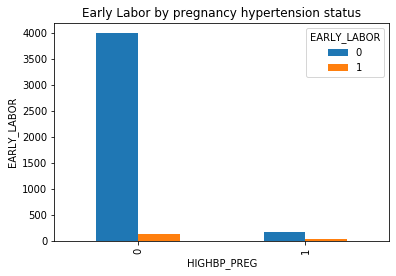

In [22]:
pd.crosstab(data.HIGHBP_PREG,data.EARLY_LABOR).plot(kind='bar')
plt.title('Early Labor by pregnancy hypertension status')
plt.xlabel('HIGHBP_PREG')
plt.ylabel('EARLY_LABOR')
#to save the figures, use plt.savefig('name')

Text(0, 0.5, 'Frequency')

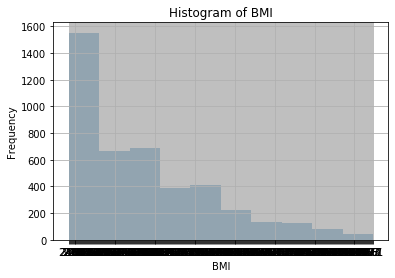

In [25]:
data.BMI.hist()
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

In [26]:
Var_Corr = df_2.corr()

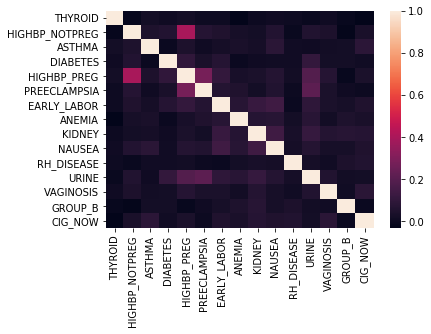

In [27]:
# plot the heatmap and annotation on it
heat = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
#heat.savefig("heat.png", bbox_inches='tight', dpi=600)
(heat).get_figure().savefig('heat.png')

In [35]:
#now we split our sample in a training and test dataset, while balancing the data (for training only)
#first, we make dummy variables for the categorical variables:
df=pd.get_dummies(df_2)

In [36]:
# Separate majority and minority classes
from sklearn.utils import resample
df_majority = df_2[df_2.EARLY_LABOR == 0]
df_minority = df_2[df_2.EARLY_LABOR == 1]

In [38]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=4309,    # to match the USA prevalence
                                 random_state=100) # reproducible results

In [39]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [40]:
# Display new class counts
df_upsampled.EARLY_LABOR.value_counts()

1.0    4309
0.0    4309
Name: EARLY_LABOR, dtype: int64